In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

from meta.custom_env import CustomEnv
from utils.fetch_data import Api, fetch_data

data = fetch_data(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01')

env = CustomEnv(data, action_space=3, observation_space=5)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


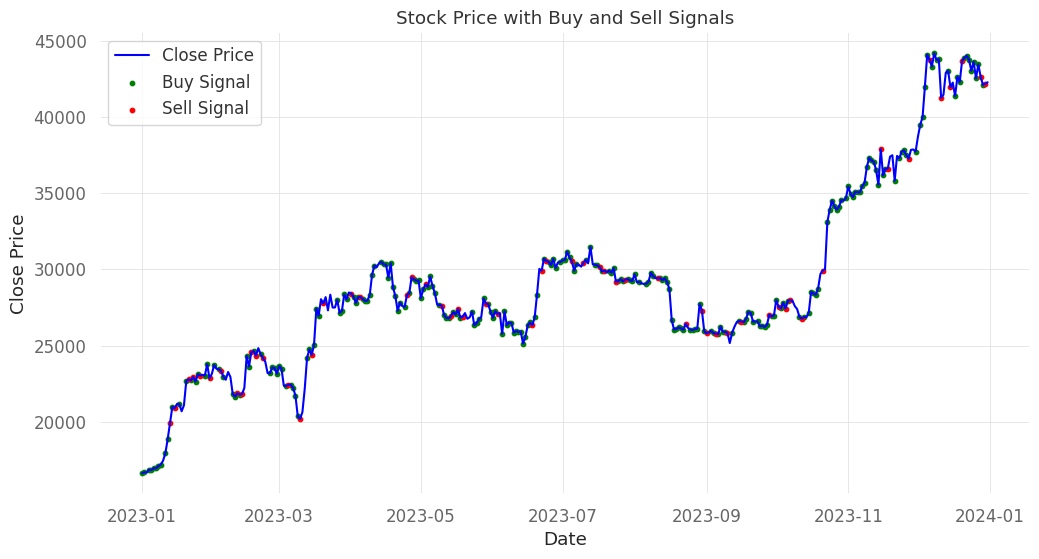

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2023-12-30
Risk-Free Rate      0.0%
Time in Market      75.0%

Cumulative Return   22.51%
CAGR﹪              15.14%

Sharpe              1.24
Prob. Sharpe Ratio  94.12%
Sortino             2.08
Sortino/√2          1.47
Omega               1.38

Max Drawdown        -7.99%
Longest DD Days     200

Gain/Pain Ratio     0.38
Gain/Pain (1M)      2.73

Payoff Ratio        1.44
Profit Factor       1.38
Common Sense Ratio  1.98
CPC Index           0.97
Tail Ratio          1.44
Outlier Win Ratio   6.77
Outlier Loss Ratio  5.65

MTD                 1.02%
3M                  14.26%
6M                  11.61%
YTD                 22.51%
1Y                  22.51%
3Y (ann.)           15.14%
5Y (ann.)           15.14%
10Y (ann.)          15.14%
All-time (ann.)     15.14%

Avg. Drawdown       -1.87%
Avg. Drawdown Days  28
Recovery Factor     2.67
Ulcer Index         0.04
Serenity Index      0.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


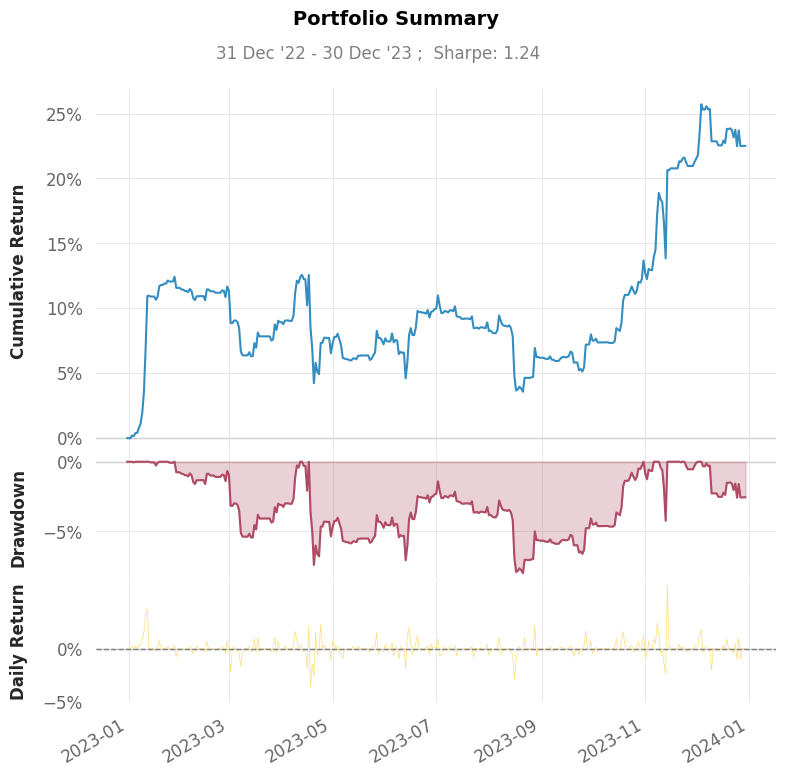

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


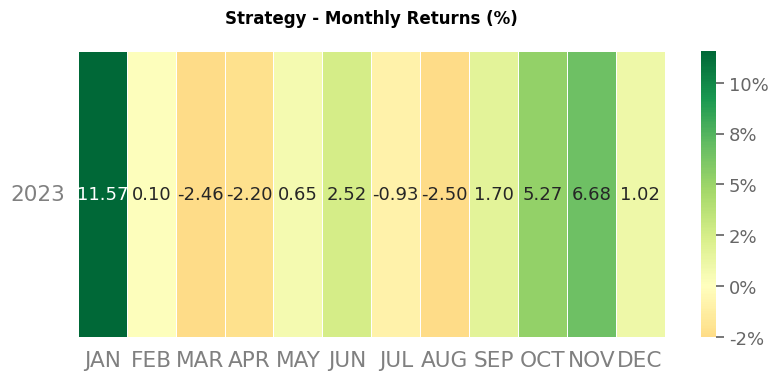

In [2]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-01-01')

test_env = CustomEnv(test_data, action_space=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)